# Markov generation of wine reviews

## TODO
- Start with capital
- End with period. 

In [1]:
import numpy as np 
import pandas as pd 

import random
import re 
import string

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv('../input/winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
# add some relevant data
df['description_length'] = df.description.apply(lambda x: len(re.findall("(\S+)", x)))

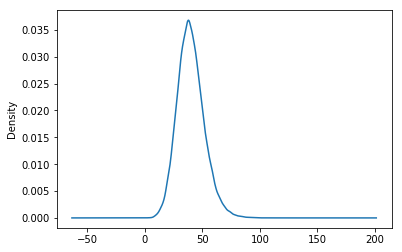

In [4]:
df.description_length.plot.kde()

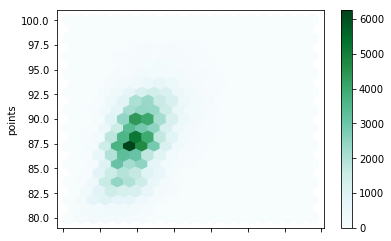

In [5]:
df.plot.hexbin('description_length', 'points', gridsize=20)

In [6]:
df.description[0]

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'

In [7]:
# Note: df.description[:10].to_string() only gives a string representation, not the full string
descriptions = ''
for i in range(0, 500):
    descriptions += f'{df.description[i]} '

# Not sure if it's better to remove non-strings (e.g. 100%), for now don't
# ALSO, leaving in punctuation is actually pretty fun
# description_words = ''.join([x + '' for x in descriptions if x in string.ascii_letters  + '\'- '])
description_words = descriptions

words = description_words.split(" ")
words[:20]

['This',
 'tremendous',
 '100%',
 'varietal',
 'wine',
 'hails',
 'from',
 'Oakville',
 'and',
 'was',
 'aged',
 'over',
 'three',
 'years',
 'in',
 'oak.',
 'Juicy',
 'red-cherry',
 'fruit',
 'and']

In [8]:
prefix = {}
for i in range(len(words)-2):
    if (words[i], words[i+1]) not in prefix:
        prefix[(words[i], words[i+1])] = []
    prefix[(words[i], words[i+1])].append(words[i+2])
    
len(prefix)

13799

In [9]:
random.seed(10)

num_words = 100
current_pair = random.choice(list(prefix.keys())) 
random_text = current_pair[0] + ' ' + current_pair[1]

for i in range(num_words-2):
    # last two words in document may not have a suffix
    if current_pair not in prefix:
        break
    next = random.choice(prefix[current_pair])
    random_text = random_text + ' ' + next
    current_pair = (current_pair[1], next)
    
random_text

'Too elegant for some palates, it shows the intensity of fruit from 14 different parcels. It is dark and chewy, this builds upon substantial black-cherry fruit anchors this barrel-aged wine that will develop quickly. It is aged in Stainless steel, this racy and pungent earth scents, remaining savory at its core. Medium-bodied and balanced with soft tannins and tart cherry. The tannins are right to the palate into the lasting finish, which is lightly toasted and dense black fruits are chocolaty and well oaked. Raw heat and minty, coffee flavors rev up the finish. Dried cranberry and cherry flavors that'

## Okay, let's choose 5 random descriptions then 5 fake reviews

In [10]:
for i in range(0,5):
    print(f'RANDOM REVIEW {i}')
    row = df.sample(random_state=i)
    print(row.description.values[0])

RANDOM REVIEW 0
Made entirely from Nero d'Avola, this opens with black-skinned berry, freshly turned soil and cooking spice aromas. The soft, juicy palate offers blackberry, carob and clove flavors while rounded tannins lend a smooth texture. Enjoy through 2019.
RANDOM REVIEW 1
The color and aromas are true to both Pinot Noir and Chile's Pinot-friendly Casablanca Valley. Dried fruit, citrus and pie cherry aromas take it toward a potpourri of red-fruit flavors. The only weakness is that the feel is a bit choppy and the finish goes heavy on the toast and woodspice. A good but imperfect effort at a more serious Chilean Pinot.
RANDOM REVIEW 2
Old-gold in color, this wine has concentrated flavors with an almost medicinal intensity. Old wood and acidity form a dominant element along with a note of orange peel. A memorable wine for savoring.
RANDOM REVIEW 3
This is a strong, oaky, ripe Chardonnay, grown on a mountain better known for Cabernet. It's powerful and intense in pineapple tart, pear

In [14]:
for i in range(0,5):
    print(f'SETTING SEED {i}')
    random.seed(i)
    
    num_words = random.choice(df.description_length)

    current_pair = random.choice(list(prefix.keys())) 
    random_text = current_pair[0] + ' ' + current_pair[1]

    for i in range(num_words-2):
        # last two words in document may not have a suffix
        if current_pair not in prefix:
            break
        next = random.choice(prefix[current_pair])
        random_text = random_text + ' ' + next
        current_pair = (current_pair[1], next)

    print(random_text)

SETTING SEED 0
new-wood flavors. It is all fruit, generous and delicious. The huge fruit flavors give a wine that's black-purple in color, showing some bricking. It drinks full bodied and dry, but with a phenolic, almost creamy feel. Wiry aromas of vanilla cookie are offset by crisp acidity.
SETTING SEED 1
pepper, clove and licorice alongside fine-grained tannins. A perfect steakhouse Cabernet. Structured and energetic, this has a full, almost Burgundian feel. Ripe peach combines with vanilla to make this medium-bodied wine, which finds its way to the finish is
SETTING SEED 2
the Loire river. The aromas that recall honeysuckle, lily of the few in California and Oregon. This tart, juicy, and deliciously fresh effort is loaded with dark chocolate and full-bodied weight push the finish is showing unabsorbed oak and char come up, and the finish is fruity and generous. Bright orange juice, dill herbs and red fruit. This contrasts with the heat of alcohol on the palate is marked by beef char